## Exemplo dados expressão genética - pipeline completo de análise

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Leitura de dados e metadados

O ALL é um conjunto de dados de expressão genética (dados de DNA microarrays) de pacientes com leucemia (linfoblástica aguda). Cada amostra (num total de 128) corresponde a um paciente de leucemia, tendo disponível a medida de 12625 probes (que correspondem a mRNA de genes do paciente). Cada paciente é caracterizado por um conjunto de variáveis clínicas.

In [2]:
# lendo dados usando pandas
data_all = pd.read_csv("all_geneexp.csv", sep='\t', index_col = 0)
# lendo metadados
meta_all = pd.read_csv("metadata-ALL.csv", sep = "\t", index_col = 0)

# colocando em matriz de genes (nas colunas) e amostras (nas linhas)
data_all = data_all.transpose()

In [3]:
# Dimensao dos dados: linhas - pacientes; colunas - expressao genetica
print(data_all.values.shape)
# Dimensao dos metadados
print(meta_all.values.shape)

(128, 12625)
(128, 5)


### Exploração dos dados e metadados

In [4]:
data_all.describe()

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,7.548189,5.008460,3.898461,5.980585,5.815370,9.022764,3.650952,7.301389,8.805146,9.287179,...,4.441549,4.363089,3.445644,2.993966,3.771522,3.400151,3.200710,3.314870,3.748967,3.772650
std,0.260154,0.310953,0.204992,0.258275,0.266532,1.109113,0.174126,0.620520,0.512525,0.425623,...,0.410534,0.394520,0.415812,0.413118,0.410054,0.387862,0.477664,0.444788,0.885906,0.526467
min,6.549926,4.218220,3.416923,5.156087,4.634124,6.379843,3.046491,6.034525,7.906461,7.292769,...,3.062682,3.486735,2.536123,2.263963,2.767693,2.553967,2.446435,2.454894,2.714501,2.696426
25%,7.382817,4.803799,3.739214,5.800138,5.700050,8.217088,3.541715,6.824173,8.457428,9.064331,...,4.228290,4.140774,3.232355,2.779095,3.567743,3.194825,2.978152,3.080499,3.191187,3.464303
50%,7.569005,4.965856,3.909525,6.021260,5.852087,9.022537,3.645946,7.285423,8.682517,9.276952,...,4.417516,4.315935,3.373231,2.914470,3.712690,3.365643,3.107428,3.250382,3.411647,3.676795
75%,7.729556,5.177936,4.047797,6.194794,5.977736,9.751638,3.771999,7.724039,9.055975,9.576289,...,4.655479,4.546084,3.641641,3.101190,3.888372,3.551896,3.262033,3.450719,3.928952,3.948769
max,8.188617,6.408157,4.648154,6.430906,6.494545,11.653732,4.211380,9.199404,10.956793,10.334430,...,6.336573,6.579822,5.718844,5.223791,5.910215,5.401391,5.463561,5.499641,7.050007,5.992389


In [5]:
data_all.transpose().describe()

,01005,01010,03002,04006,04007,04008,04010,04016,06002,08001,...,37001,43006,43015,44001,49004,56007,64005,65003,83001,LAL4
count,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,...,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000,12625.000000
mean,5.629663,5.647532,5.633270,5.630800,5.629627,5.640141,5.628059,5.596646,5.621250,5.641015,...,5.621712,5.615599,5.607109,5.628560,5.613613,5.644623,5.635797,5.584765,5.630508,5.619787
std,1.878316,1.853447,1.891571,1.863235,1.969992,1.901137,1.915637,1.972921,1.854198,1.920660,...,1.823912,1.836086,1.874867,1.826784,1.840455,1.821786,1.825175,1.804621,1.890289,1.763510
min,2.434882,2.423489,2.270794,2.266403,2.304342,2.402498,2.302909,2.330925,2.400333,2.382472,...,2.362676,2.428902,2.338718,2.407674,2.288986,2.468669,2.346690,2.481516,2.446911,2.377925
25%,4.110729,4.138544,4.118112,4.125402,4.012995,4.092817,4.060414,3.979573,4.145525,4.085494,...,4.154565,4.126564,4.085371,4.169137,4.131681,4.168931,4.160098,4.118830,4.083090,4.198234
50%,5.455297,5.532123,5.479052,5.489971,5.437263,5.501443,5.480261,5.400454,5.456214,5.456045,...,5.463254,5.455397,5.446506,5.442011,5.461996,5.514475,5.495860,5.440054,5.458681,5.505415
75%,6.825681,6.867437,6.859845,6.827895,6.901632,6.861054,6.873054,6.850350,6.788000,6.896056,...,6.810212,6.838215,6.831038,6.780349,6.826540,6.869452,6.832303,6.790878,6.860347,6.787282
max,13.455378,13.673926,13.795645,13.721009,13.879841,13.544389,13.573128,13.494362,13.888707,13.480839,...,13.553862,13.471868,13.872455,13.580862,13.502852,13.885026,13.701229,13.597862,13.524883,13.671110


In [6]:
data_all.head()

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
01005,7.597323,5.046194,3.900466,5.903856,5.925260,8.570990,3.656143,7.623562,8.903547,9.371888,...,4.365777,4.127825,3.469720,2.977916,3.623308,3.416213,3.281261,3.216799,3.395100,3.805801
01010,7.479445,4.932537,4.208155,6.169024,5.912780,10.428299,3.853979,7.543604,9.903953,9.322177,...,4.559372,4.452035,3.243264,2.650942,3.621928,3.344428,2.997496,2.978343,3.154582,3.092056
03002,7.567593,4.799294,3.886169,5.860459,5.893209,9.616713,3.646808,7.916954,8.494499,9.304982,...,4.309676,4.157649,3.228969,2.751669,3.497549,3.250417,2.888443,3.145237,3.076809,3.428454
04006,7.384684,4.922627,4.206798,6.116890,6.170245,9.937155,3.874289,6.816397,9.533983,9.135370,...,4.808575,4.205917,3.399563,2.960073,3.834567,3.589504,3.050276,3.098193,3.134195,3.336388
04007,7.905312,4.844565,3.416923,5.687997,5.615210,9.983809,3.547361,7.516981,8.871669,9.627175,...,4.120906,3.899734,3.027191,2.806713,3.485573,3.140334,3.037369,3.292282,5.943431,4.043344


In [7]:
meta_all.dtypes

sex          object
age         float64
BT           object
mol.biol     object
mdr          object
dtype: object

In [8]:
meta_all.head()

,sex,age,BT,mol.biol,mdr
01005,M,53.0,B2,BCR/ABL,NEG
01010,M,19.0,B2,NEG,POS
03002,F,52.0,B4,BCR/ABL,NEG
04006,M,38.0,B1,ALL1/AF4,NEG
04007,M,57.0,B2,NEG,NEG


In [9]:
meta_all.describe(include = "all")

,sex,age,BT,mol.biol,mdr
count,125,123.000000,128,128,128
unique,2,NaN,10,6,2
top,M,NaN,B2,NEG,NEG
freq,83,NaN,36,74,104
mean,NaN,32.373984,NaN,NaN,NaN
std,NaN,13.803301,NaN,NaN,NaN
min,NaN,5.000000,NaN,NaN,NaN
25%,NaN,19.000000,NaN,NaN,NaN
50%,NaN,29.000000,NaN,NaN,NaN
75%,NaN,45.500000,NaN,NaN,NaN


In [10]:
meta_all.groupby("sex").size()  ## genero

sex
F    42
M    83
dtype: int64

In [11]:
meta_all.groupby("mdr").size() ## multidrug resistant

mdr
NEG    104
POS     24
dtype: int64

In [12]:
meta_all.groupby("BT").size() ## B or T cells

BT
B      5
B1    19
B2    36
B3    23
B4    12
T      5
T1     1
T2    15
T3    10
T4     2
dtype: int64

In [13]:
meta_all.groupby("mol.biol").size() ## mutations

mol.biol
ALL1/AF4    10
BCR/ABL     37
E2A/PBX1     5
NEG         74
NUP-98       1
p15/p16      1
dtype: int64

In [14]:
data_all.isnull().sum().sum() ## valores nulos

0

In [15]:
meta_all.isnull().sum().sum()

8

In [16]:
meta_all.isnull().sum() ## valores nulos nos metadados

sex         3
age         5
BT          0
mol.biol    0
mdr         0
dtype: int64

### Exploração gráfica

<AxesSubplot:ylabel='None'>

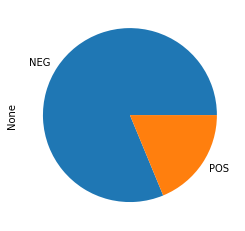

In [17]:
meta_all.groupby("mdr").size().plot.pie()

<AxesSubplot:ylabel='None'>

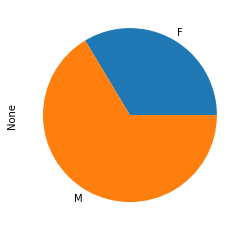

In [18]:
meta_all.groupby("sex").size().plot.pie()

<AxesSubplot:xlabel='BT'>

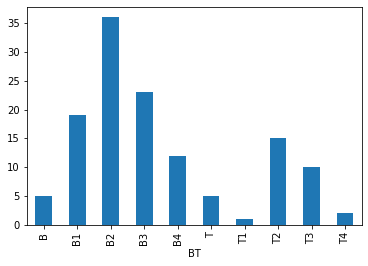

In [19]:
meta_all.groupby("BT").size().plot.bar()

### Análise estatística univariada e filtros

In [20]:
input_data = data_all.values  ## apenas a matriz de valores numpy
print(input_data.shape)

(128, 12625)


In [21]:
variances = input_data.var(axis = 0) # calculando a variancia de cada gene
print(variances.shape)
medvar = variances.mean()
medvar

(12625,)


0.2231149729545439

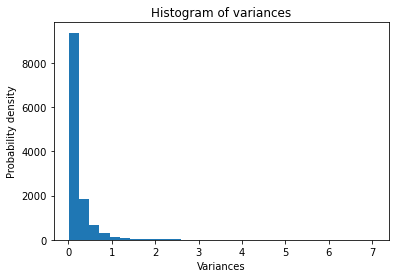

In [22]:
plt.hist(variances, bins = 30)
plt.xlabel('Variances')
plt.ylabel('Probability density')
plt.title(r'Histogram of variances')
plt.show()

In [23]:
# filtros variabilidade (flat pattern)
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold= medvar*3)
input_filt = sel.fit_transform(input_data)
input_filt.shape

(128, 796)

In [24]:
# genes diferencialmente expressos - variavel MDR
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import preprocessing

# fclassif - ANOVA ou t-test (neste caso t-test pois mdr tem apenas duas classes)
# seleciona genes com menor p-value (os 10% com menor valor)
selector = SelectPercentile(f_classif, percentile=10)

output_mdr = meta_all.values[:,4]

selector.fit_transform(data_all, output_mdr)
genes_de = np.where(selector.pvalues_ <0.01)
print(data_all.columns[genes_de])

Index(['1170_at', '1529_at', '1578_g_at', '157_at', '1643_g_at', '31498_f_at',
       '31499_s_at', '31518_i_at', '31549_at', '31960_f_at', '32200_at',
       '32419_at', '32421_at', '32486_at', '32534_f_at', '32590_at',
       '32722_at', '33129_at', '33130_at', '33465_at', '33541_s_at',
       '33574_at', '33615_at', '33649_at', '33655_f_at', '33720_at',
       '33899_at', '33941_at', '33991_g_at', '34034_at', '34284_at',
       '34452_at', '34478_at', '34507_s_at', '34564_at', '34942_at',
       '34960_g_at', '35008_at', '35172_at', '35390_at', '35457_at',
       '35636_at', '35729_at', '35808_at', '35944_at', '36111_s_at',
       '36112_r_at', '36198_at', '36382_at', '36460_at', '36548_at',
       '36693_at', '36779_at', '36934_at', '36970_at', '37051_at', '37054_at',
       '37109_at', '37400_at', '37440_at', '37969_at', '38140_at', '38328_at',
       '38348_at', '38430_at', '38433_at', '38478_at', '38489_at',
       '38596_i_at', '38633_at', '38634_at', '38828_s_at', '38907_at',


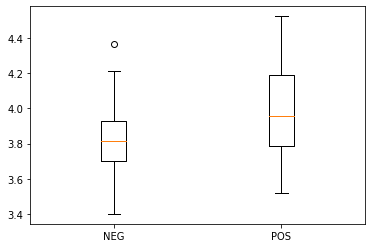

In [25]:
data_gene = data_all.loc[:,'38433_at']
data_neg = data_gene[meta_all["mdr"]=="NEG"]
data_pos = data_gene[meta_all["mdr"]=="POS"]

both = [data_neg, data_pos]
plt.boxplot(both)
plt.xticks([1,2], ["NEG", "POS"])
plt.show()

### Análise multivariada não supervisionada

In [26]:
# pre-processamento: standardizacao dos dados
from sklearn import preprocessing

input_sc = preprocessing.scale(input_data)
print("Media: ", input_sc.mean())
print("Desvio padrao: ", input_sc.std())

Media:  1.1117179784008894e-16
Desvio padrao:  1.0000000000000002


In [27]:
# principal component analysis
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_r = pca.fit(input_sc).transform(input_sc)
print('Var. explicada: %s'% str(pca.explained_variance_ratio_))
pca.explained_variance_ratio_.sum()

Var. explicada: [0.18105531 0.1079421  0.06091631 0.0457015  0.03591725 0.03057383
 0.02569002 0.0216379  0.02048319 0.01948614 0.017208   0.01441475
 0.01435184 0.01370037 0.0123788  0.01068473 0.01017123 0.00943394
 0.00876544 0.00825705]


0.668769702456696

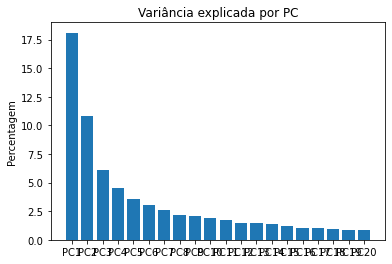

In [28]:
n = 20
plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

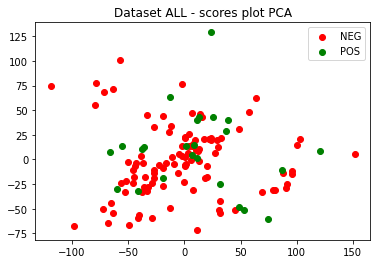

In [29]:
plt.figure()
for c, name in zip("rgb", ["NEG", "POS"]):
    plt.scatter(X_r[output_mdr == name, 0], X_r[output_mdr == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

In [30]:
# clustering hierarquico
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

hclust = AgglomerativeClustering(n_clusters=2, affinity="euclidean",
                                 linkage="ward")
hclust.fit(input_sc)

output_bt = meta_all.values[:,2]  # pode experimentar-se com as outras variaveis de metadados
res_hc = hclust.labels_
pd.crosstab(output_bt, res_hc)

col_0,0,1
row_0,,
B,5,0
B1,13,6
B2,30,6
B3,18,5
B4,10,2
T,4,1
T1,1,0
T2,14,1
T3,10,0


In [31]:
# k-means
from sklearn.cluster import KMeans

kmeans_est = KMeans(init='random', n_clusters=3, n_init = 100)
res_kmeans = kmeans_est.fit(input_sc).predict(input_sc)

pd.crosstab(output_mdr, res_kmeans) # pode experimentar-se com as outras variaveis de metadados

col_0,0,1,2
row_0,,,
NEG,41,16,47
POS,7,5,12


### Aprendizagem máquina

Vamos considerar como variável de output, a variável MDR. Nos atributos, vamos considerar apenas os genes considerados com diferencialmente expressos acima. Poderá experimentar com outros genes ...

In [32]:
input_sc_filt2 = input_sc[:,genes_de[0]]
print(input_sc_filt2.shape)

(128, 88)


In [33]:
# criando dados para treino e para teste dos modelos de machine learning
import numpy as np

indices = np.random.permutation(len(input_sc_filt2))
indices

numts = int(1/3 * input_sc_filt2.shape[0]) ## 2/3 dos dados para treino; 1/3 para teste
train_in = input_sc_filt2[indices[:-numts]]
train_out = output_mdr[indices[:-numts]]
test_in  = input_sc_filt2[indices[-numts:]]
test_out = output_mdr[indices[-numts:]]

In [34]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds = knn.predict(test_in)
print("Valores previstos: ", preds)
print("Valores reais: " , test_out)
print("Perc. acertos: ", (preds == test_out).sum()/len(preds) )

Valores previstos:  ['NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG'
 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG'
 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG'
 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG']
Valores reais:  ['NEG' 'POS' 'POS' 'NEG' 'NEG' 'POS' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG'
 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'POS' 'NEG' 'NEG' 'NEG'
 'NEG' 'NEG' 'NEG' 'NEG' 'NEG' 'POS' 'NEG' 'NEG' 'POS' 'POS' 'NEG' 'POS'
 'NEG' 'NEG' 'NEG' 'POS' 'NEG' 'POS']
Perc. acertos:  0.7619047619047619


In [35]:
# matriz de confusão

from sklearn.metrics import confusion_matrix
confusion_matrix(test_out, preds)

array([[32,  0],
       [10,  0]])

In [36]:
# f1-score
# F1 = 2 * (precision * recall) / (precision + recall)

from sklearn.metrics import f1_score
f1_score(test_out, preds, pos_label = "POS")

0.0

In [37]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Perc. acertos: ", (preds_tree == test_out).sum()/len(preds_tree) )
print("Matriz de confusão: ")
print(confusion_matrix(test_out, preds_tree) )
print("F1: ", f1_score(test_out, preds_tree, pos_label = "POS"))

Perc. acertos:  0.6904761904761905
Matriz de confusão: 
[[28  4]
 [ 9  1]]
F1:  0.13333333333333333


In [38]:
from sklearn import svm

svm_model = svm.SVC(gamma=0.001, C=100.)

svm_model = svm_model.fit(train_in, train_out)
preds_svm = svm_model.predict(test_in)

print("Perc. acertos: ", (preds_svm == test_out).sum()/len(preds_svm) )
print("Matriz de confusão: ")
print(confusion_matrix(test_out, preds_svm) )
print("F1: ", f1_score(test_out, preds_svm, pos_label = "POS"))

Perc. acertos:  0.7619047619047619
Matriz de confusão: 
[[28  4]
 [ 6  4]]
F1:  0.4444444444444445


In [39]:
# avaliacao dos modelos com validacao cruzada
from sklearn.model_selection import cross_val_score

model_svm = svm.SVC(gamma=0.001, C=100.)
scores = cross_val_score(model_svm, input_sc_filt2, output_mdr, cv = 5)
print(scores)
print(scores.mean())

[0.61538462 0.80769231 0.69230769 0.88       0.84      ]
0.767076923076923


In [40]:
from sklearn.metrics import make_scorer
my_f1_scorer = make_scorer(f1_score, pos_label = "POS")
scores_f1 = cross_val_score(model_svm, input_sc_filt2, output_mdr, scoring = my_f1_scorer, cv = 5)
print(scores_f1)
print(scores_f1.mean())

[0.         0.54545455 0.         0.66666667 0.5       ]
0.3424242424242424
